# Imports

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

# Carregar os datasets tratados

In [70]:
data_df = pd.read_csv('/home/gabipereira/EvolucaoDaMusica-BI/data/data.csv')
musicdata_df = pd.read_csv('/home/gabipereira/EvolucaoDaMusica-BI/data/musicdata.csv')
charts_df = pd.read_csv('/home/gabipereira/EvolucaoDaMusica-BI/data/charts.csv')
new_df = pd.read_csv('/home/gabipereira/EvolucaoDaMusica-BI/data/Best selling music artists.csv')
new_artists_df = pd.read_csv('/home/gabipereira/EvolucaoDaMusica-BI/data/Artists.csv')
final_df = pd.read_csv('/home/gabipereira/EvolucaoDaMusica-BI/data/final.csv')

# Visualização de popularidade das músicas ao longo dos anos

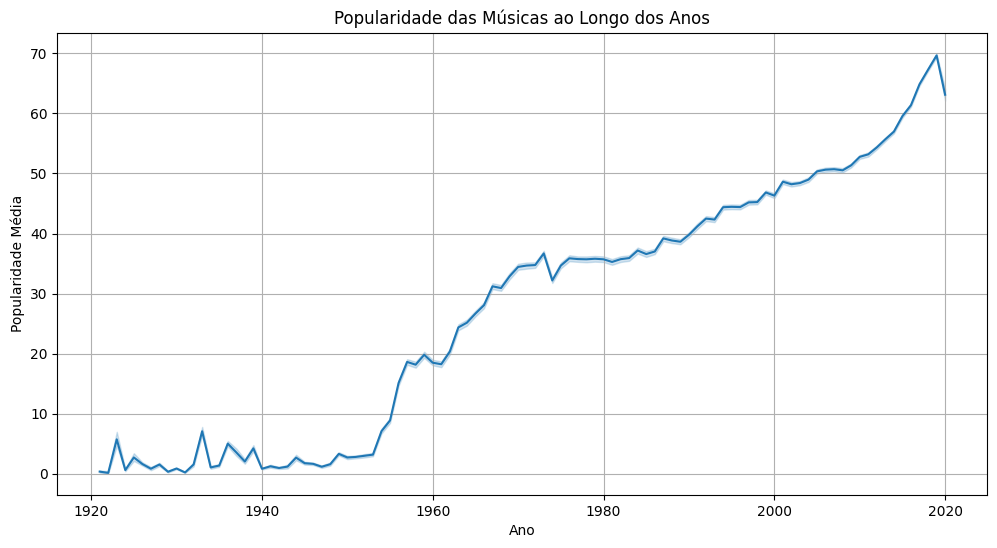

In [71]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data_df, x='year', y='popularity')
plt.title('Popularidade das Músicas ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Popularidade Média')
plt.grid(True)
plt.show()

# Visualização dos picos de diferentes formatos de mídia

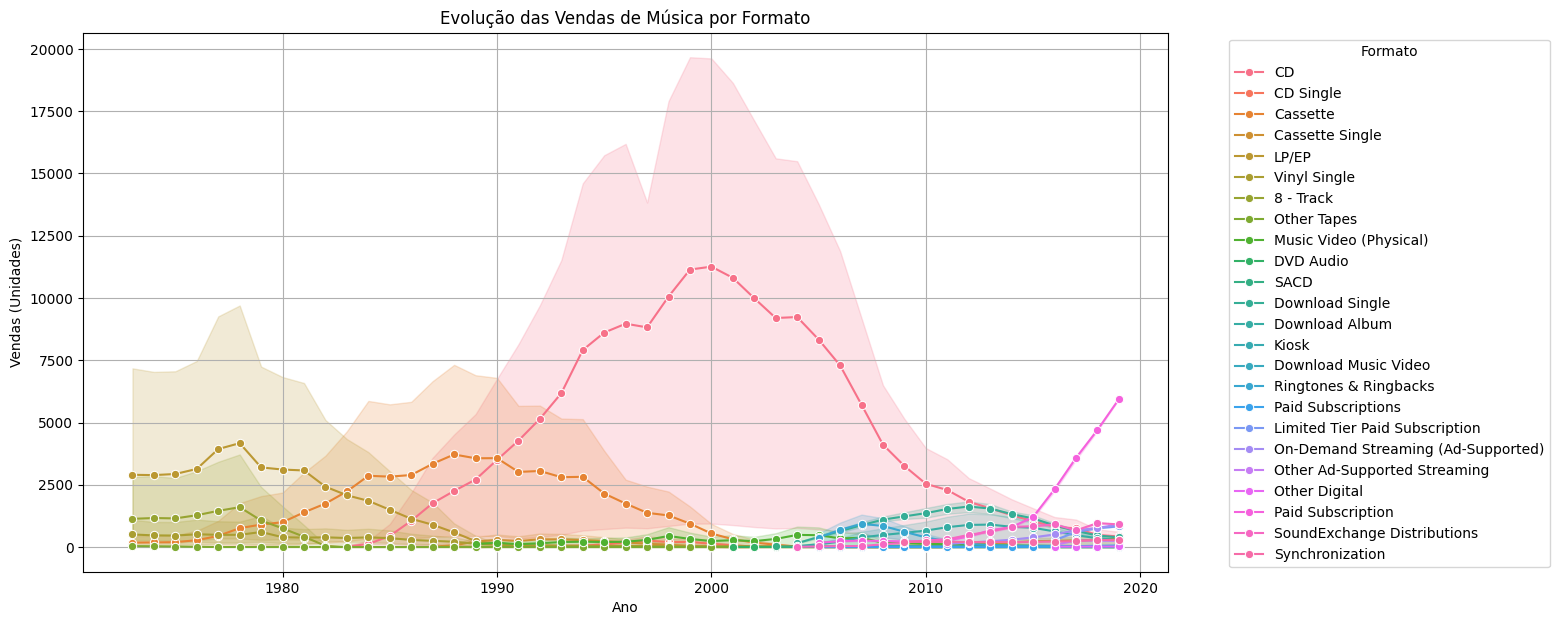

In [72]:
# Plotar os dados
plt.figure(figsize=(14, 7))
sns.lineplot(data=musicdata_df, x='year', y='value_actual', hue='format', marker='o')

plt.title('Evolução das Vendas de Música por Formato')
plt.xlabel('Ano')
plt.ylabel('Vendas (Unidades)')
plt.legend(title='Formato', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Visualização dos rankings do Billboard Hot 100
A Billboard Hot 100 é uma parada musical que classifica as 100 músicas mais populares nos Estados Unidos. O ranking é determinado por uma combinação de vendas físicas e digitais, execuções em rádio e streaming. A posição número 1 é a mais alta, significando a música mais popular da semana, e a posição 100 é a mais baixa.

- Dataset: Billboard "The Hot 100" Songs
- Link: https://www.kaggle.com/datasets/dhruvildave/billboard-the-hot-100-songs

/tmp/ipykernel_151459/1233350390.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=charts_df, x='date', y='rank', ci=None)


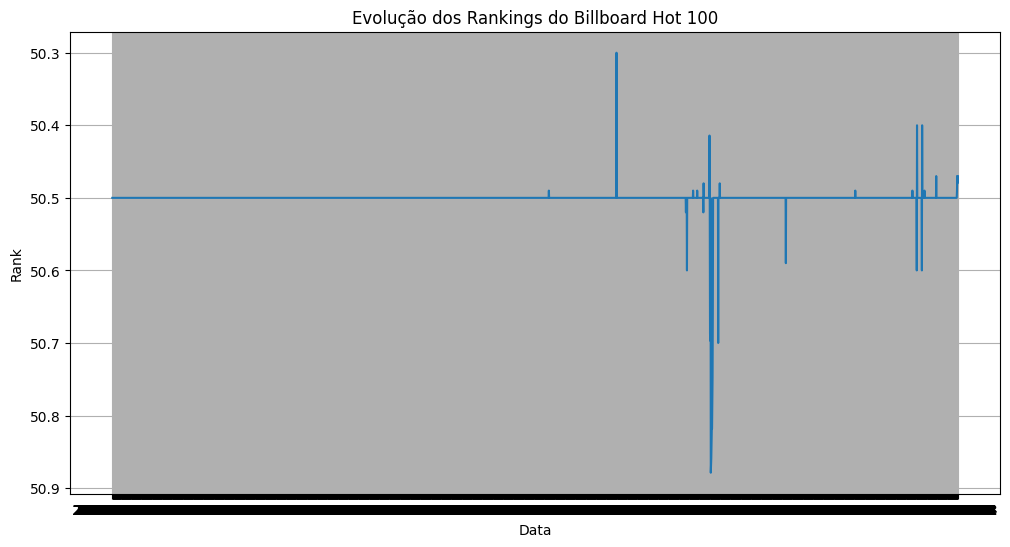

In [73]:
plt.figure(figsize=(12,6))
sns.lineplot(data=charts_df, x='date', y='rank', ci=None)
plt.gca().invert_yaxis()  # Inverte o eixo Y para que o ranking 1 esteja no topo
plt.title('Evolução dos Rankings do Billboard Hot 100')
plt.xlabel('Data')
plt.ylabel('Rank')
plt.grid(True)
plt.show()

# Artistas mais ouvidos por formato de mídia e seus generos musicais
- Dados retirados do dataset: US Top 10K Artists and Their Popular Songs
- Spotify
- Link: https://www.kaggle.com/datasets/spoorthiuk/us-top-10k-artists-and-their-popular-songs

/tmp/ipykernel_151459/1279872959.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top_artists_sales['Genres'].fillna('Indefinido', inplace=True)


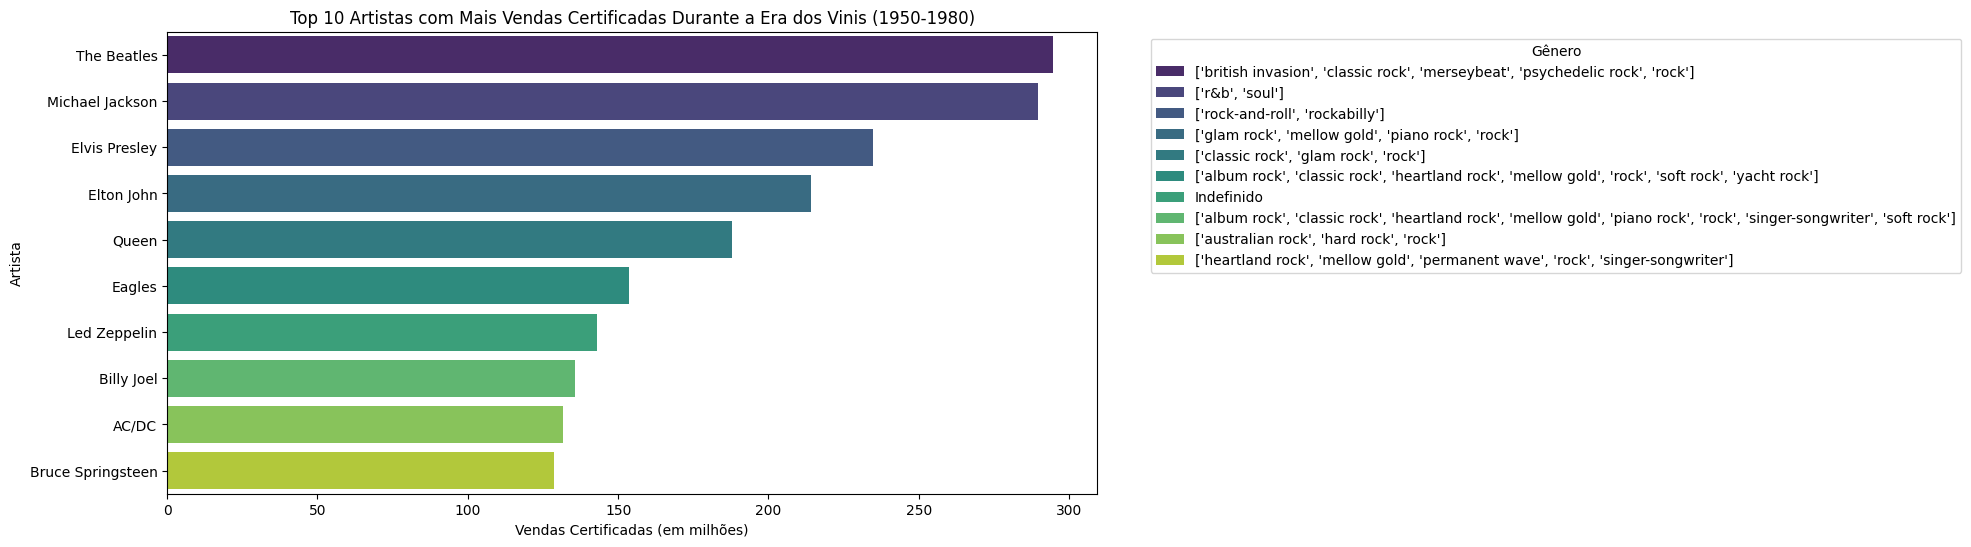

/tmp/ipykernel_151459/1279872959.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top_artists_sales['Genres'].fillna('Indefinido', inplace=True)


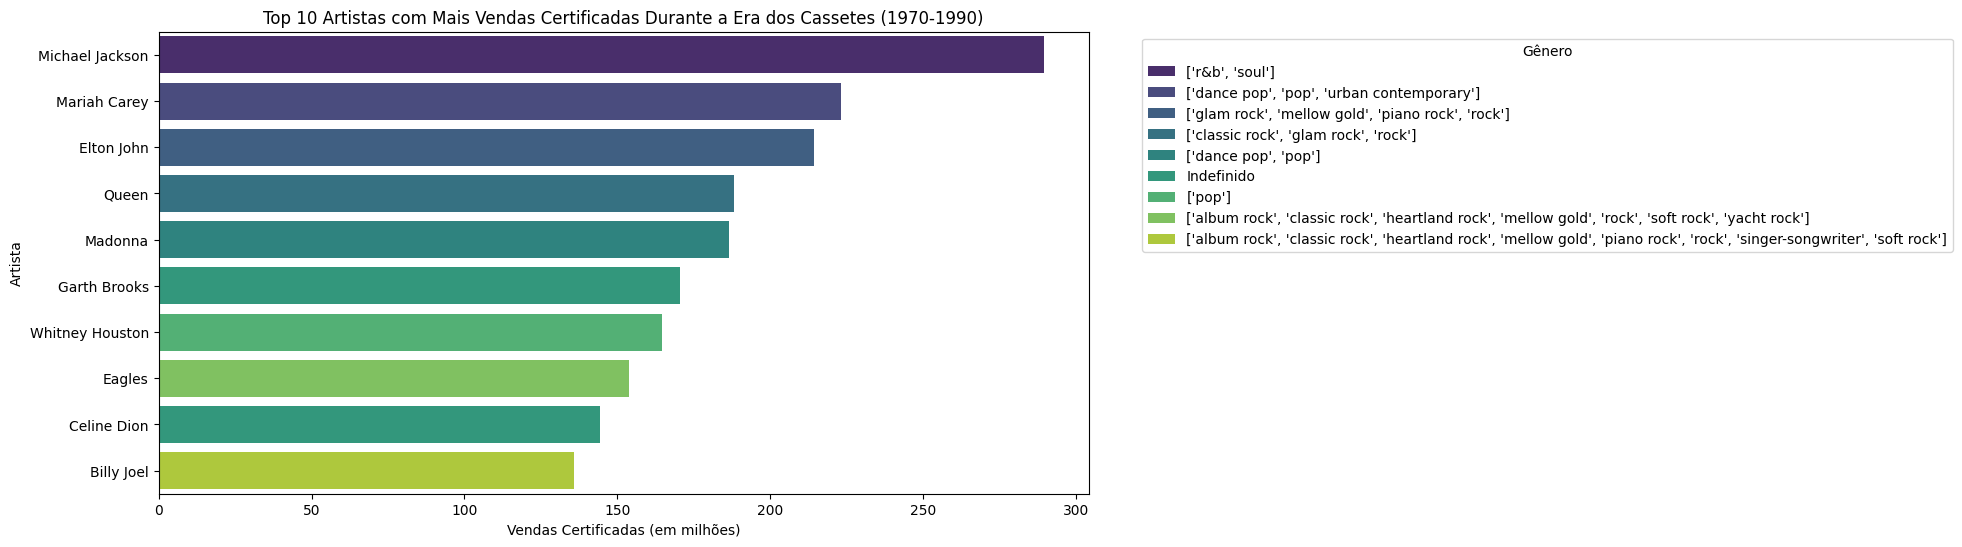

/tmp/ipykernel_151459/1279872959.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top_artists_sales['Genres'].fillna('Indefinido', inplace=True)


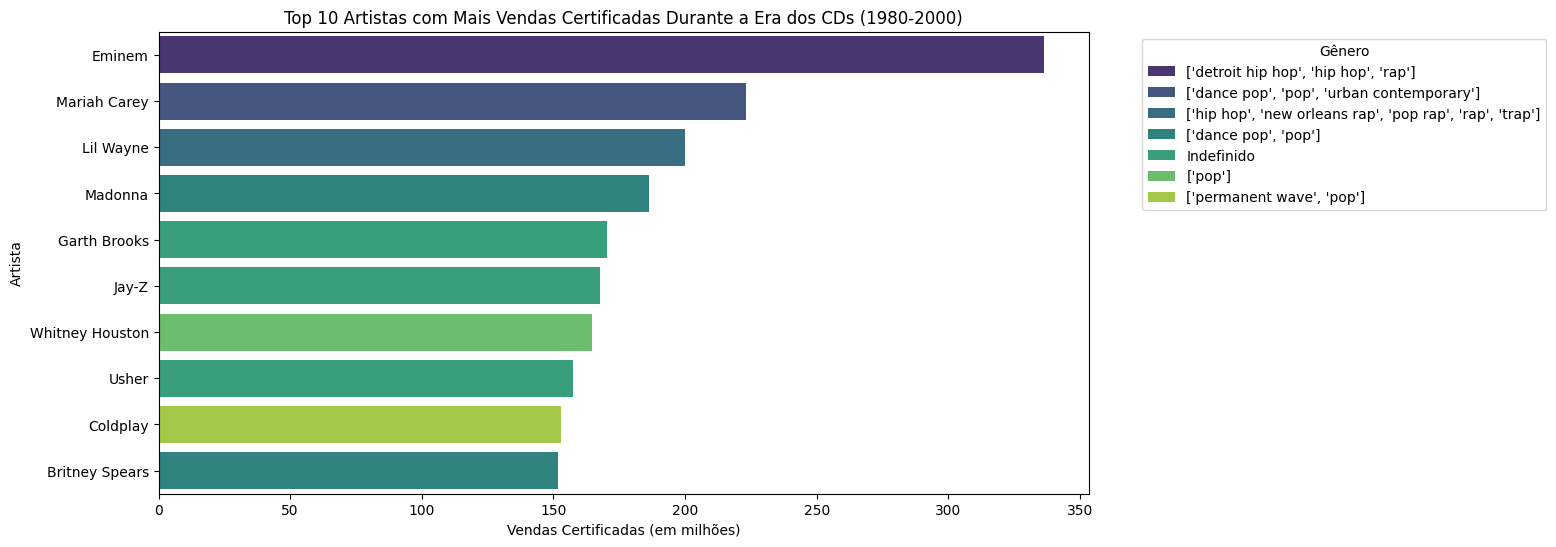

/tmp/ipykernel_151459/1279872959.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  top_artists_sales['Genres'].fillna('Indefinido', inplace=True)


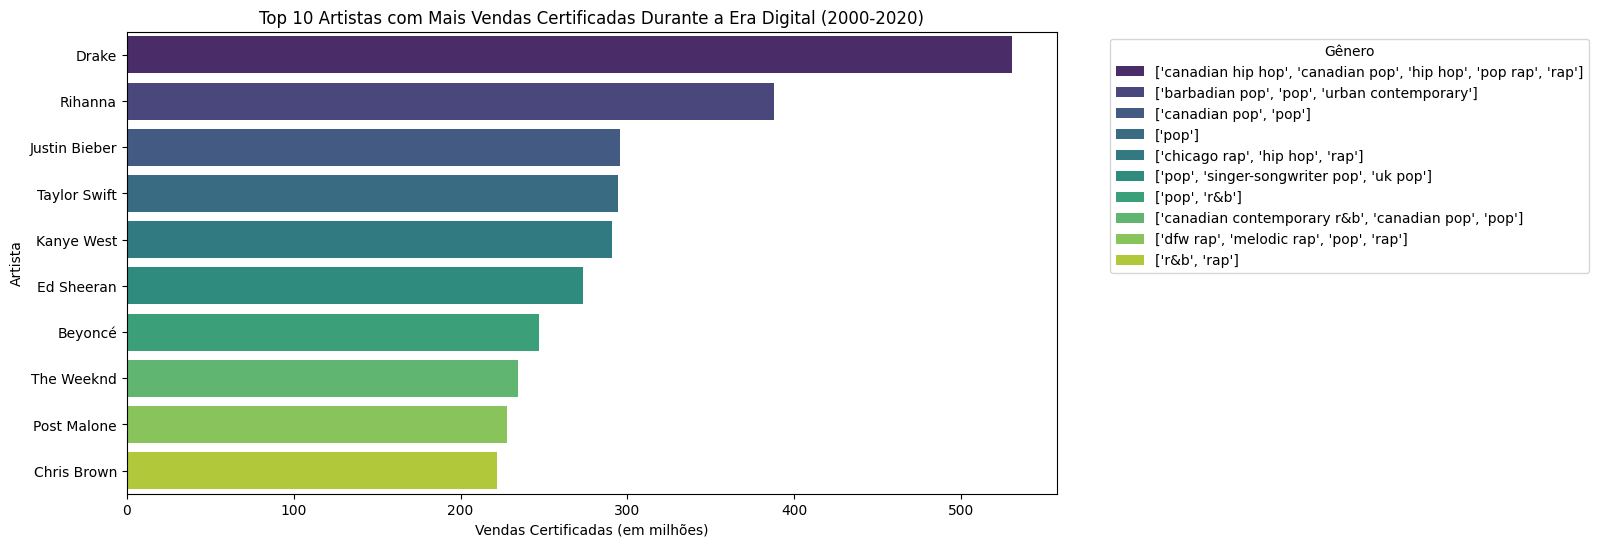

In [83]:
# Função para integrar gênero e criar gráfico para diferentes eras
def plot_top_artists_by_sales_with_genre(dataframe, genre_dataframe, start_year, end_year, era_name):
    era_df = dataframe[(dataframe['Release year of first charted record'] >= start_year) & (dataframe['Release year of first charted record'] <= end_year)]
    artists_sales = era_df.groupby('Artist name')['Total certified units'].sum().reset_index()
    top_artists_sales = artists_sales.sort_values(by='Total certified units', ascending=False).head(10)
    
    # Integrar com dados de gênero
    top_artists_sales = top_artists_sales.merge(genre_dataframe[['Name', 'Genres']], left_on='Artist name', right_on='Name', how='left')
    
    # Preencher valores ausentes de gênero com "Indefinido"
    top_artists_sales['Genres'].fillna('Indefinido', inplace=True)

    # Visualizar os resultados
    plt.figure(figsize=(12,6))
    sns.barplot(data=top_artists_sales, x='Total certified units', y='Artist name', hue='Genres', dodge=False, palette='viridis')
    plt.title(f'Top 10 Artistas com Mais Vendas Certificadas Durante a Era {era_name} ({start_year}-{end_year})')
    plt.xlabel('Vendas Certificadas (em milhões)')
    plt.ylabel('Artista')
    plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Analisar e visualizar diferentes eras com gêneros
plot_top_artists_by_sales_with_genre(new_df, new_artists_df, 1950, 1980, 'dos Vinis')
plot_top_artists_by_sales_with_genre(new_df, new_artists_df, 1970, 1990, 'dos Cassetes')
plot_top_artists_by_sales_with_genre(new_df, new_artists_df, 1980, 2000, 'dos CDs')
plot_top_artists_by_sales_with_genre(new_df, new_artists_df, 2000, 2020, 'Digital')


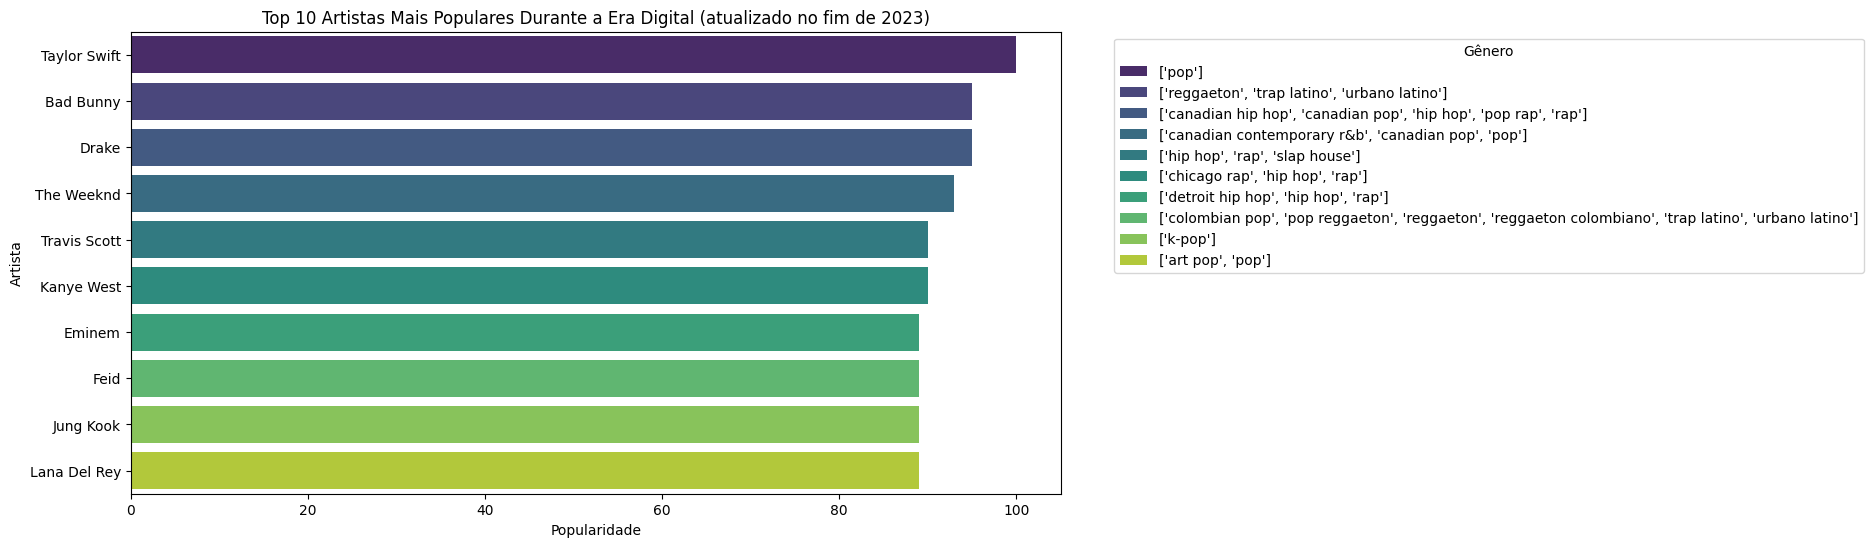

In [75]:
artists_digital_popularity = new_artists_df.groupby(['Name', 'Genres'])['Popularity'].mean().reset_index()

# Classificar os artistas pela popularidade e selecionar os top 10
top_artists_digital_popularity = artists_digital_popularity.sort_values(by='Popularity', ascending=False).head(10)

# Visualizar os resultados
plt.figure(figsize=(12,6))
sns.barplot(data=top_artists_digital_popularity, x='Popularity', y='Name', hue='Genres', dodge=False, palette='viridis')
plt.title('Top 10 Artistas Mais Populares Durante a Era Digital (atualizado no fim de 2023)')
plt.xlabel('Popularidade')
plt.ylabel('Artista')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Artistas com mais Discos vendidos (vinil)
- Dataset somente sobre vendas de vinil

/tmp/ipykernel_151459/2597485382.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists_vinyl_sales, x='sales', y='artist', palette='viridis')


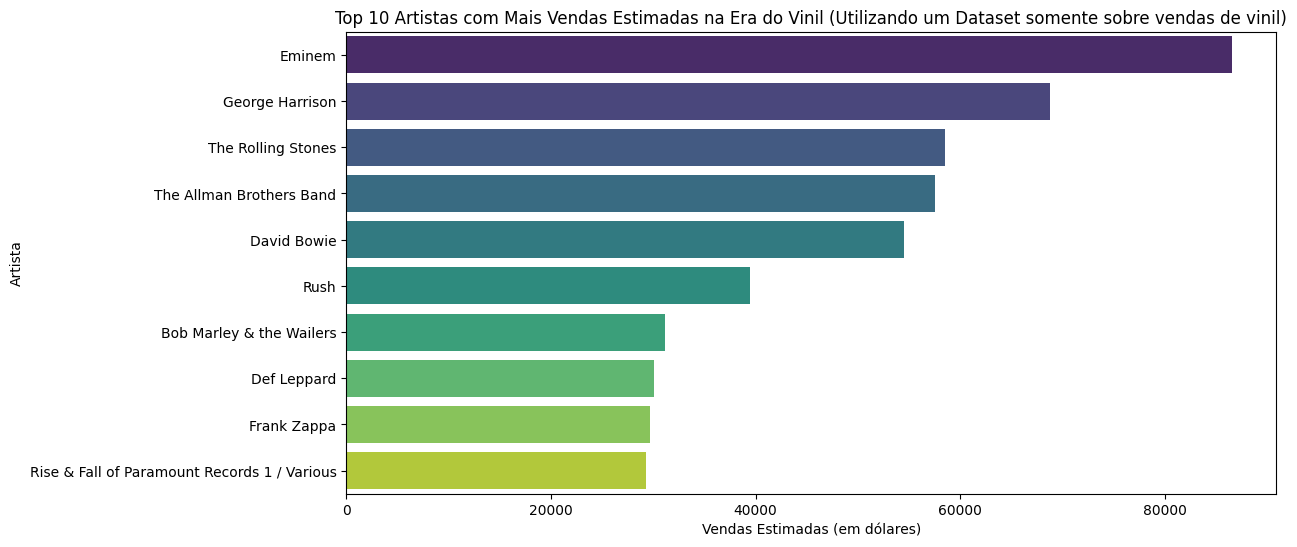

In [76]:
# Criar uma nova coluna 'sales' estimada como price * stock
final_df['sales'] = final_df['price'] * final_df['stock']

# Excluir a linha com 'Various Artists'
final_df = final_df[final_df['artist'] != 'Various Artists']

# Agrupar por artista e somar as vendas estimadas
artists_vinyl_sales = final_df.groupby('artist')['sales'].sum().reset_index()

# Classificar os artistas pela quantidade de vendas e selecionar os top 10
top_artists_vinyl_sales = artists_vinyl_sales.sort_values(by='sales', ascending=False).head(10)

# Visualizar os resultados
plt.figure(figsize=(12,6))
sns.barplot(data=top_artists_vinyl_sales, x='sales', y='artist', palette='viridis')
plt.title('Top 10 Artistas com Mais Vendas Estimadas na Era do Vinil (Utilizando um Dataset somente sobre vendas de vinil)')
plt.xlabel('Vendas Estimadas (em dólares)')
plt.ylabel('Artista')
plt.show()